In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import csv

In [2]:
# read file
file = "../04_Data/test_data/EEG_&_Phys_raw.csv"
dfData = pd.read_csv(file, skiprows=15, sep=",", encoding="ISO-8859-1", index_col=False)

# set start time
start_time = pd.Timestamp('2022-06-26 10:03:24')

# convert time to pandas datetime
unix_time = int(pd.Timestamp(start_time).timestamp())
dfData["Time"] += unix_time
dfData['Time'] = pd.to_datetime(dfData['Time'], unit='s')
print(f"start time of measurement: {dfData['Time'].iloc[0]}")

start time of measurement: 2022-06-26 10:03:24.003299840


In [3]:
### slice df if needed
if True:
    t_start = '2022-06-26 10:05:24'
    t_end = '2022-06-26 10:06:24'
    dfData = dfData.loc[(dfData["Time"] >= pd.Timestamp(t_start)) & 
                        (dfData["Time"] <= pd.Timestamp(t_end))]

In [4]:
dfData.describe()

,P3,C3,F3,Fz,F4,C4,P4,Cz,CM,A1,...,F8,RSP1,A2,T6,T4,Trigger,Time_Offset,ADC_Status,ADC_Sequence,Event
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.00000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.0,18000.00000,18000.0,18000.00000,18000.0
mean,380.996533,-447.116950,367.022267,-105.654017,-609.12500,541.143950,58.112917,322.005400,-4954.268367,-81.436183,...,-279.339767,-376.989283,-421.696050,129.993133,-735.632667,0.0,270002.00000,0.0,127.66000,0.0
std,29.939747,323.279756,362.292462,120.026368,417.52136,39.154756,16.258758,13.232944,400.143975,34.990598,...,174.401356,13.959632,35.511453,15.789058,128.118485,0.0,31177.78055,0.0,73.79285,0.0
min,318.900000,-1072.200000,-438.300000,-340.500000,-1237.50000,428.100000,7.500000,280.800000,-6817.200000,-197.400000,...,-806.700000,-402.000000,-568.200000,73.500000,-964.800000,0.0,216005.00000,0.0,0.00000,0.0
25%,354.900000,-693.600000,-72.675000,-218.400000,-906.60000,518.100000,47.400000,312.600000,-5261.100000,-102.000000,...,-398.100000,-394.200000,-442.200000,118.800000,-804.300000,0.0,243003.50000,0.0,64.00000,0.0
50%,369.900000,-435.450000,453.300000,-108.300000,-741.90000,539.700000,57.600000,321.300000,-4964.700000,-79.800000,...,-297.000000,-370.800000,-416.400000,130.200000,-735.300000,0.0,270002.00000,0.0,128.00000,0.0
75%,411.000000,-114.300000,568.275000,-18.600000,-475.80000,566.400000,69.300000,331.200000,-4668.300000,-54.900000,...,-143.700000,-366.600000,-394.800000,141.000000,-688.500000,0.0,297000.50000,0.0,191.00000,0.0
max,455.100000,16.800000,1147.500000,222.000000,841.80000,681.000000,109.800000,371.100000,-3556.800000,31.200000,...,315.300000,-353.400000,-335.700000,211.800000,-22.800000,0.0,323999.00000,0.0,255.00000,0.0


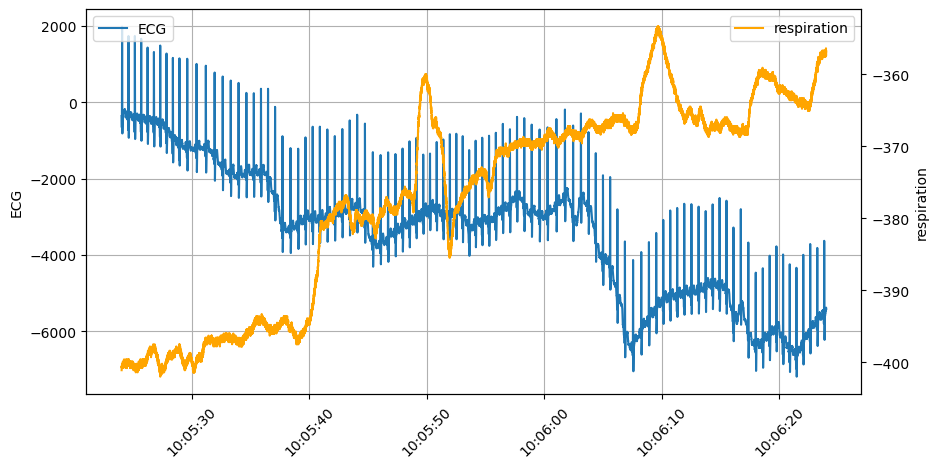

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(dfData["Time"], dfData["ECG1"], label="ECG")
ax.set_ylabel("ECG")
ax.legend(loc=2)
ax.tick_params(axis='x', labelrotation = 45)
axr = ax.twinx()
axr.plot(dfData["Time"], dfData["RSP1"], label="respiration", c="orange")
axr.set_ylabel("respiration")
axr.legend(loc=0)
ax.grid()
plt.show()

In [10]:
dfData.loc[:, ["Time", "ECG1", "RSP1"]].head()

,Time,ECG1,RSP1
36000,2022-06-26 10:05:24.002799872,-356.4,-401.1
36001,2022-06-26 10:05:24.006099968,-384.9,-400.5
36002,2022-06-26 10:05:24.009399808,-464.1,-400.5
36003,2022-06-26 10:05:24.012800000,-561.3,-400.5
36004,2022-06-26 10:05:24.016099840,-631.2,-400.8
